In [285]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

path = r"C:\Module\build-modules\Bank_Marketing\bank-marketing.csv"

df = pd.read_csv(path)
df.head()

,age,age group,eligible,job,salary,marital,education,marital-education,targeted,default,...,contact,day,month,duration,campaign,pdays,previous,poutcome,y,response
0,58,5,Y,management,100000,married,tertiary,married-tertiary,yes,no,...,unknown,5,may,261,1,-1,0,unknown,no,0
1,44,4,Y,technician,60000,single,secondary,single-secondary,yes,no,...,unknown,5,may,151,1,-1,0,unknown,no,0
2,33,3,Y,entrepreneur,120000,married,secondary,married-secondary,yes,no,...,unknown,5,may,76,1,-1,0,unknown,no,0
3,47,4,Y,blue-collar,20000,married,unknown,married-unknown,no,no,...,unknown,5,may,92,1,-1,0,unknown,no,0
4,33,3,Y,unknown,0,single,unknown,single-unknown,no,no,...,unknown,5,may,198,1,-1,0,unknown,no,0


In [286]:
# format for columns
df.columns = [x.lower().replace('-','_').replace(' ','_') for x in df.columns.to_list()]
df.sample(5,random_state=42)

,age,age_group,eligible,job,salary,marital,education,marital_education,targeted,default,...,contact,day,month,duration,campaign,pdays,previous,poutcome,y,response
3776,40,4,Y,blue-collar,20000,married,secondary,married-secondary,yes,no,...,unknown,16,may,192,1,-1,0,unknown,no,0
9928,47,4,Y,services,70000,single,secondary,single-secondary,yes,no,...,unknown,9,jun,83,2,-1,0,unknown,no,0
33409,25,2,Y,student,4000,single,tertiary,single-tertiary,no,no,...,cellular,20,apr,226,1,-1,0,unknown,no,0
31885,42,4,Y,management,100000,married,tertiary,married-tertiary,yes,no,...,cellular,9,apr,311,1,336,1,failure,no,0
15738,56,5,Y,management,100000,married,tertiary,married-tertiary,yes,no,...,cellular,21,jul,121,2,-1,0,unknown,no,0


------------- EDA ------------------
Exploratory Data Analysis

In [287]:
# checking for missing values

df.isna().sum()

age                  0
age_group            0
eligible             0
job                  0
salary               0
marital              0
education            0
marital_education    0
targeted             0
default              0
balance              0
housing              0
loan                 0
contact              0
day                  0
month                0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
y                    0
response             0
dtype: int64

In [288]:
# Check for Column's unique values
for x in df.columns.to_list():
    print(f"{x}: \n{df[x].sort_values().unique()}\n")
    

age: 
[18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65
 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89
 90 92 93 94 95]

age_group: 
[1 2 3 4 5 6 7 8 9]

eligible: 
['N' 'Y']

job: 
['admin.' 'blue-collar' 'entrepreneur' 'housemaid' 'management' 'retired'
 'self-employed' 'services' 'student' 'technician' 'unemployed' 'unknown']

salary: 
[     0   4000   8000  16000  20000  50000  55000  60000  70000 100000
 120000]

marital: 
['divorced' 'married' 'single']

education: 
['primary' 'secondary' 'tertiary' 'unknown']

marital_education: 
['divorced-primary' 'divorced-secondary' 'divorced-tertiary'
 'divorced-unknown' 'married-primary' 'married-secondary'
 'married-tertiary' 'married-unknown' 'single-primary' 'single-secondary'
 'single-tertiary' 'single-unknown']

targeted: 
['no' 'yes']

default: 
['no' 'yes']

balance: 
[ -8019  -6847  -4057 ...  81204  98417 10212

In [289]:
non_target = df.columns.to_list()
non_target.remove('y')
non_target.remove('response')

# df.duplicated(non_target).sum()

In [290]:
# Now target columns are 'y' and 'target'

# Drop y as its redundant with target column

if 'y' in df.columns.to_list():
    df = df.drop(['y'] , axis = 1)

df.head()

# df.drop(columns='y',inplace=True)
# df.head()

,age,age_group,eligible,job,salary,marital,education,marital_education,targeted,default,...,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,5,Y,management,100000,married,tertiary,married-tertiary,yes,no,...,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,4,Y,technician,60000,single,secondary,single-secondary,yes,no,...,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,3,Y,entrepreneur,120000,married,secondary,married-secondary,yes,no,...,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,4,Y,blue-collar,20000,married,unknown,married-unknown,no,no,...,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,3,Y,unknown,0,single,unknown,single-unknown,no,no,...,no,unknown,5,may,198,1,-1,0,unknown,0


In [291]:
# change pdays -1 to 0

df.pdays = df.pdays.apply(lambda x:0 if (x == -1) else x)
df.sample(5)

,age,age_group,eligible,job,salary,marital,education,marital_education,targeted,default,...,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
32812,49,4,Y,services,70000,married,secondary,married-secondary,yes,no,...,no,cellular,17,apr,79,1,0,0,unknown,0
43914,28,2,Y,unemployed,8000,single,secondary,single-secondary,yes,no,...,no,cellular,14,jun,516,1,0,0,unknown,0
28164,30,3,Y,student,4000,single,secondary,single-secondary,yes,no,...,no,cellular,29,jan,67,1,0,0,unknown,0
10784,38,3,Y,technician,60000,single,tertiary,single-tertiary,no,no,...,no,unknown,17,jun,193,1,0,0,unknown,0
16426,47,4,Y,technician,60000,single,secondary,single-secondary,yes,no,...,no,cellular,23,jul,957,3,0,0,unknown,1


In [292]:
# For plotting we need numerical data not categorical
# Seperate num and categorical 

cats = list(df.select_dtypes(include=['object', 'datetime64[ns]','bool']))

nums = list(df.select_dtypes(include='int64'))

print(f" Categorical : \n{cats}")
print(f" Numerical : \n{nums}")

 Categorical : 
['eligible', 'job', 'marital', 'education', 'marital_education', 'targeted', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
 Numerical : 
['age', 'age_group', 'salary', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'response']


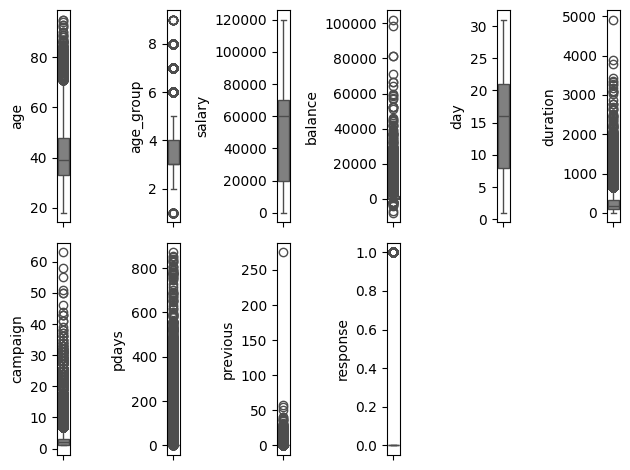

In [293]:
# Detect Outliers

for i in range(0, len(nums)):
    plt.subplot(2, (len(nums)//2)+1, i+1)
    sns.boxplot(y=df[nums[i]], color='gray', orient='v')
    plt.tight_layout()

In [294]:
# for col in ['balance','duration','campaign']:
#     plt.figure(figsize=(2, 2))
#     sns.boxplot(y=df[col], color='gray', orient='v')
#     plt.tight_layout()

In [295]:
# Remove outlier

# Above boxplot shows outliers in 'balance' , 'duration' , 'campaign'
# Remove them using Z-score
# Z-score measures how far a value is from the mean in units of standard deviation.
# In outlier detection, rows with ∣Z∣≥3 in any column are considered outliers and dropped.
# 1. Calculate standard devaiation and mean than apply z score.
# 2. if in any row z score is more than or equal to 3 remove that row as it is outlier.

In [296]:
# zscore to remove outliers

from scipy import stats

print(f" Number of rows before removing outlier : {len(df)}")
# mark all rows as TRUE at start
filter_entries = np.array([True] * len(df))

for col in ['balance','duration','campaign']:
    zscore = abs(stats.zscore(df[col]))         # calculate absolute Z-scores
    filter_entries = (zscore < 3) & filter_entries    # keep only rows with abs(Z) < 3

df = df[filter_entries]          # filter: keep only rows where all selected columns have Z < 3

print(f" Number of rows after removing outliers : {len(df)}")



 Number of rows before removing outlier : 45211
 Number of rows after removing outliers : 42707


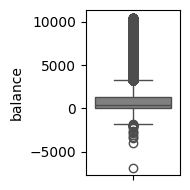

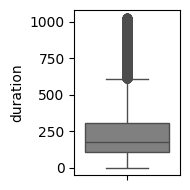

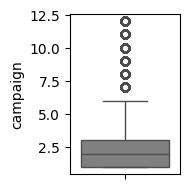

In [297]:
for col in ['balance','duration','campaign']:
    plt.figure(figsize=(2, 2))
    sns.boxplot(y=df[col], color='gray', orient='v')
    plt.tight_layout()

<Axes: >

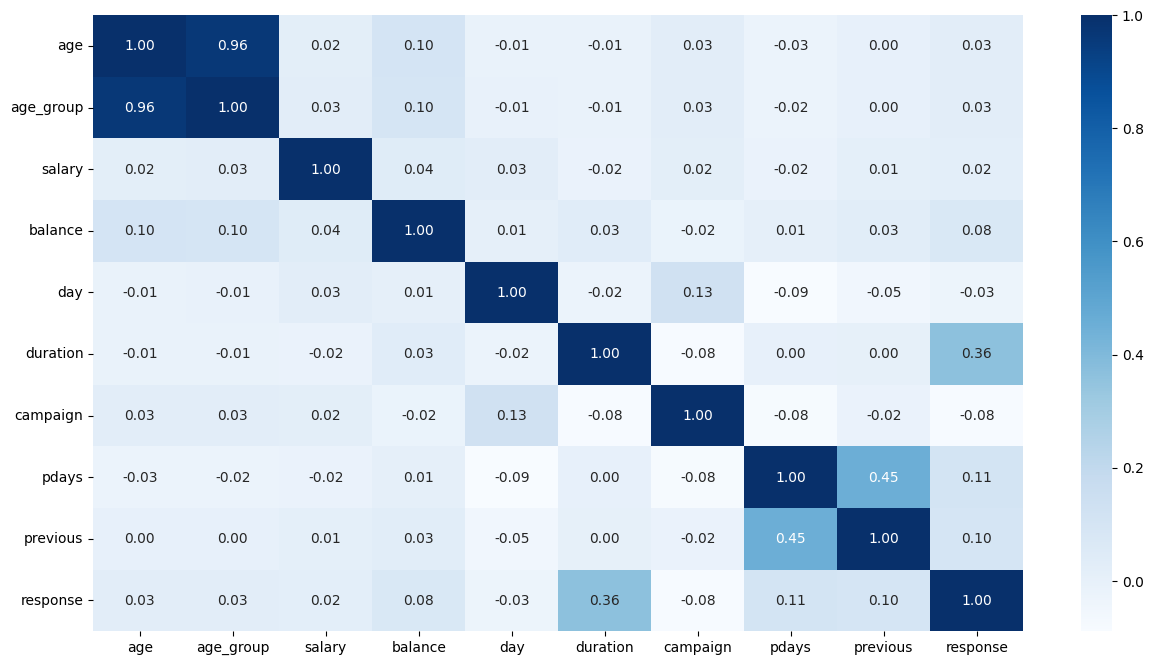

In [298]:
# correlation check

df_new = df[nums].copy()
plt.figure(figsize=(15,8))
sns.heatmap(df_new.corr(), cmap='Blues', annot=True, fmt='.2f')


In [299]:
# we're chechking the highest correlation column to our target column('response') 
# and we get column 'duration', 'pdays', and 'previous'

-------------- Insight ----------------------------

<Figure size 1000x1500 with 0 Axes>

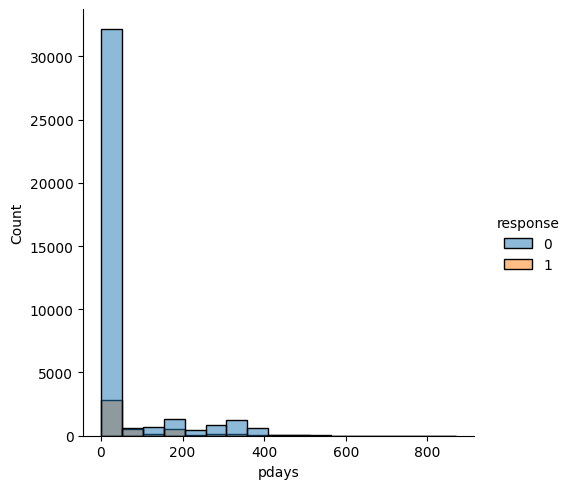

In [300]:
# pdays: number of days that passed by after the client was last contacted.

plt.figure(figsize=(10,15))
sns.displot(x = 'pdays', hue='response', data=df_new, binwidth=50 )

In [301]:
# from above graph tells us that
# When pdays = 0, it means the customer was contacted in the current campaign. In this case, the response rate is higher.
# As pdays increases (e.g., around 400 days since last contact), the response rate decreases, 
# meaning the likelihood of product purchase drops.


<Figure size 1000x1500 with 0 Axes>

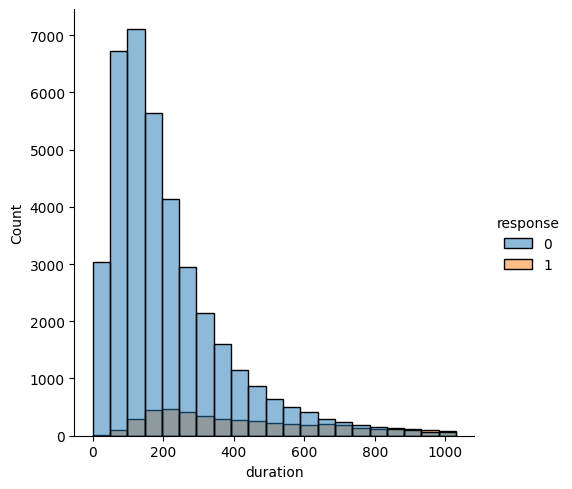

In [302]:
# duration: number of days

plt.figure(figsize=(10,15))
sns.displot(x='duration', hue='response', data=df_new, binwidth= 50)

In [303]:
# duration is a strong predictor of response.

# Longer calls are correlated with successful response, while shorter calls are correlated with rejection.
# duration (x-axis): This represents the length of each customer call in seconds. 
# For example, 100 on the x-axis means the call lasted 100 seconds.
# Count (y-axis): This is the number of calls that fall into each duration “bin.” 
# For example, a bar reaching 1500 means that around 1500 calls had durations within that range.

<Axes: xlabel='poutcome', ylabel='duration'>

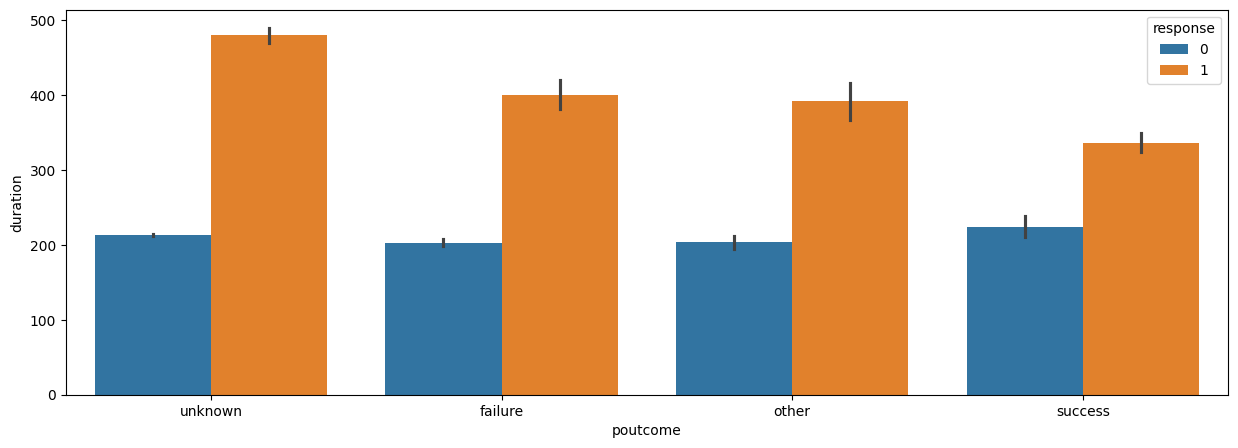

In [304]:
plt.figure(figsize=(15,5))
sns.barplot(x='poutcome', y = 'duration', hue='response', data=df)


In [305]:
# We get to know that if the longer duration to call customer then the chances 
# that customer take our product is also increasing
# and we also know that the minimum duration for making calls is 200s or 3 minutes

<Axes: xlabel='housing', ylabel='response'>

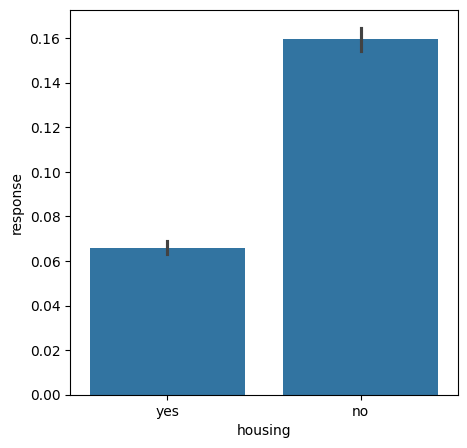

In [306]:
plt.figure(figsize=(5,5))
sns.barplot(x='housing',y='response',data=df)

In [307]:
# we get insight customer that dont have house are have higher probability to buy our product(loan).
# no means not having house so they have higher response.

----------------- Modelling ---------------------

In [308]:
# Label Encoding
# all categorical features are converted to numeric, which is necessary for most machine learning algorithms.


# Dates might not be useful directly for modeling without extracting features (like month, day, weekday). but in our data its already seperated.
if 'contacted_date' in df.columns.to_list():
    df.drop(['contacted_date'], axis=1, inplace=True)
if 'pcontacted_date' in df.columns.to_list():
    df.drop(['pcontacted_date'], axis=1, inplace=True)

for x in df.select_dtypes(include='object').columns.to_list():
    df[x] = df[x].astype('category').cat.codes

df.head()


,age,age_group,eligible,job,salary,marital,education,marital_education,targeted,default,...,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,5,1,4,100000,1,2,6,1,0,...,0,2,5,8,261,1,0,0,3,0
1,44,4,1,9,60000,2,1,9,1,0,...,0,2,5,8,151,1,0,0,3,0
2,33,3,1,2,120000,1,1,5,1,0,...,1,2,5,8,76,1,0,0,3,0
3,47,4,1,1,20000,1,3,7,0,0,...,0,2,5,8,92,1,0,0,3,0
4,33,3,1,11,0,2,3,11,0,0,...,0,2,5,8,198,1,0,0,3,0


response
0    38125
1     4582
Name: count, dtype: int64


<Axes: xlabel='response', ylabel='count'>

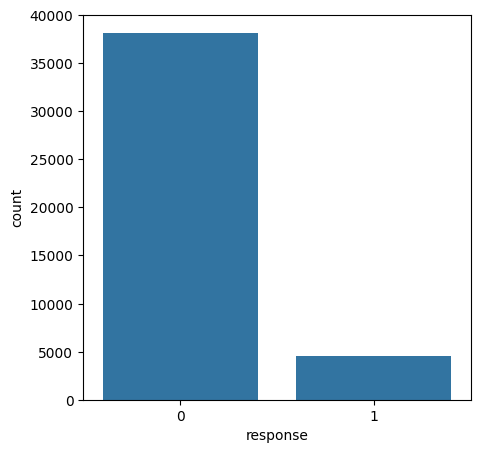

In [310]:
# check imbalance

response = df['response'].value_counts()
print(response)
plt.figure(figsize=(5,5))
sns.countplot(x = 'response', data=df)

In [ ]:
# If one class (e.g., 0) is much larger than the other (e.g., 1), 
# that means have an imbalanced target, which can affect model performance.

In [333]:
non_target = df.drop(['response'], axis=1)
target = df[['response']]

In [338]:
# Do 'smote' to balancing our target column

# SMOTE = Synthetic Minority Over-sampling Technique
# Instead of just duplicating minority samples, it creates new, synthetic samples between existing minority points 
# and their nearest neighbors.

# This increases the size of the minority class and makes the dataset more balanced.

from imblearn import under_sampling, over_sampling
x_over, y_over = over_sampling.SMOTE(sampling_strategy=0.5).fit_resample(non_target,target)
print('SMOTE : ')
print((y_over).value_counts())

SMOTE : 
response
0           38125
1           19062
Name: count, dtype: int64


<Axes: xlabel='response', ylabel='count'>

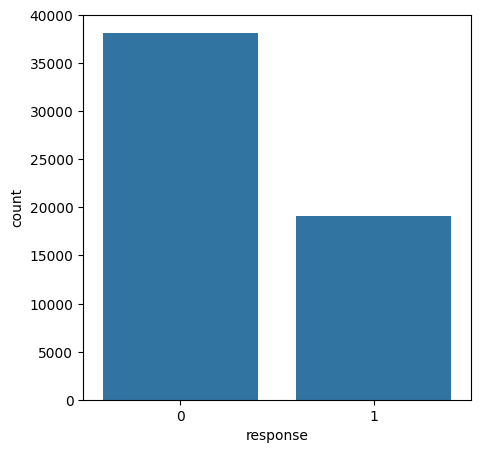

In [ ]:
#plotting target column after do smote

plt.figure(figsize=(5, 5))
sns.countplot(x ='response', data = y_over)

In [ ]:
# Testing and Training